# Random variate generation

Initial commands

In [1]:
import time
import random
from scipy.stats import beta
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf') #setting figure format to vector when exported
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['text.usetex'] = True
dpiValue=500 #is used for figures in the entire document

## Inverse method

Elapsed time for inverse method is: 1.6042580604553223 s


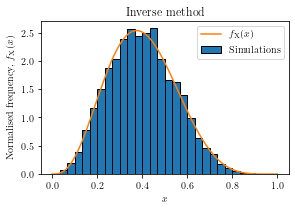

In [2]:
n=10000 #sample size
alphaCoeff=4 #alpha coefficient for beta distribution
betaCoeff=6 #beta coefficient for beta distribution

#simulations
start=time.time() #start counting the (CPU) time
u=[random.random() for i in range(n)] #random.random returns the random floating point number in the range [0.0, 1.0)
x=[beta.ppf(value,alphaCoeff,betaCoeff) for counter, value in enumerate(u)] #beta.ppf is the inverse of beta.cdf function
elapsedTimeInverse=(time.time()-start)
print('Elapsed time for inverse method is: {} s'.format(elapsedTimeInverse))

#plot
plt.figure(figsize=(10 /2.54,7/2.54))
plt.hist(x,30,density=True,range=(0,1),cumulative=False,edgecolor='black',align='mid',label='Simulations')
x=np.linspace(0,1,n,endpoint=False)
plt.plot(x,beta.pdf(x,alphaCoeff,betaCoeff),label='$f_{\mathrm{X}}(x)$')
plt.legend()
plt.title('Inverse method')
plt.xlabel('$x$')
plt.ylabel('Normalised frequency, $f_{\mathrm{X}}(x)$')
plt.tight_layout(pad=0.1)
#plt.savefig('Inverse_fX_vs_theoretically.png',dpi=dpiValue)

## Accept/reject method 1

In the method 1, n is the total number of generated samples (below and above the PDF).

Elapsed time for accept/reject method 1 is: 1.4333300590515137 s


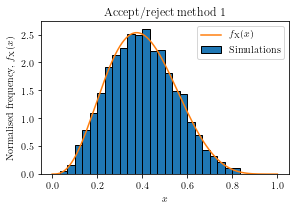

In [3]:
start=time.time() #start counting the (CPU) time
c=max(beta.pdf(np.linspace(0,1,n,endpoint=False),alphaCoeff,betaCoeff)) #upper limit of a rectangle within which random values will be generated
x=[]
u=[random.random() for i in range(n)] #value on horisontal axis
v=[c*random.random() for i in range(n)] #value on vertical axis
for counter,val in enumerate(u):
    if v[counter]<=beta.pdf(val,alphaCoeff,betaCoeff):
        x.append(val)
elapsedTimeAccRej1=(time.time()-start)
print('Elapsed time for accept/reject method 1 is: {} s'.format(elapsedTimeAccRej1))

#plot
plt.figure(figsize=(10 /2.54,7/2.54))
plt.hist(x,30,density=True,range=(0,1),cumulative=False,edgecolor='black',align='mid',label='Simulations')
x=np.linspace(0,1,n,endpoint=False)
plt.plot(x,beta.pdf(x,alphaCoeff,betaCoeff),label='$f_{\mathrm{X}}(x)$')
plt.legend()
plt.title('Accept/reject method 1')
plt.xlabel('$x$')
plt.ylabel('Normalised frequency, $f_{\mathrm{X}}(x)$')
plt.tight_layout(pad=0.1)
#plt.savefig('AccRej1_fX_vs_theoretically.png',dpi=dpiValue)

## Accept/reject method 2

In the method 1, n is the number of generated samples below the PDF.

Elapsed time for accept/reject method 2 is: 3.2989354133605957 s


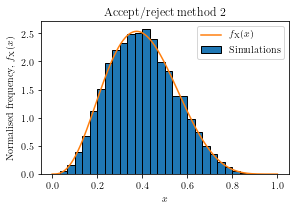

In [4]:
start=time.time() #start counting the (CPU) time
c=max(beta.pdf(np.linspace(0,1,n,endpoint=False),alphaCoeff,betaCoeff)) #upper limit of a rectangle within which random values will be generated
x=[]
while len(x)<=(n-1):
    u=random.random()
    v=c*random.random()
    if v<=beta.pdf(u,alphaCoeff,betaCoeff):
        x.append(u)
elapsedTimeAccRej2=(time.time()-start)
print('Elapsed time for accept/reject method 2 is: {} s'.format(elapsedTimeAccRej2))

#plot
plt.figure(figsize=(10 /2.54,7/2.54))
plt.hist(x,30,density=True,range=(0,1),cumulative=False,edgecolor='black',align='mid',label='Simulations')
x=np.linspace(0,1,n,endpoint=False)
plt.plot(x,beta.pdf(x,alphaCoeff,betaCoeff),label='$f_{\mathrm{X}}(x)$')
plt.legend()
plt.title('Accept/reject method 2')
plt.xlabel('$x$')
plt.ylabel('Normalised frequency, $f_{\mathrm{X}}(x)$')
plt.tight_layout(pad=0.1)
#plt.savefig('AccRej2_fX_vs_theoretically.png',dpi=dpiValue)

### Graphical representation of the accept/reject method

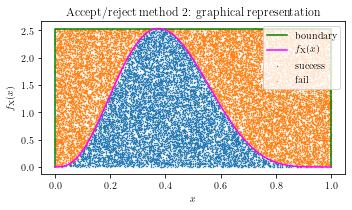

In [5]:
c=max(beta.pdf(np.linspace(0,1,n,endpoint=False),alphaCoeff,betaCoeff)) #upper limit of a rectangle within which random values will be generated
xIN=[]
xOUT=[]
yIN=[]
yOUT=[]
while len(xIN)<=(n-1):
    u=random.random()
    v=c*random.random()
    if v<=beta.pdf(u,alphaCoeff,betaCoeff):
        xIN.append(u)
        yIN.append(v)
    else:
        xOUT.append(u)
        yOUT.append(v)  

#plot
fig=plt.figure(figsize=(12/2.54,7/2.54))
ax=plt.axes()
ax.scatter(xIN,yIN,s=0.2,label='success')
ax.scatter(xOUT,yOUT,s=0.2,label='fail')
ax.plot([0,0,1,1],[0,c,c,0],c='green',label='boundary')
ax.plot(np.linspace(0,1,n,endpoint=False),beta.pdf(np.linspace(0,1,n,endpoint=False),alphaCoeff,betaCoeff),color='magenta',label='$f_{\mathrm{X}}(x)$') 
ax.set_xlabel('$x$')
ax.set_ylabel('$f_{\mathrm{X}}(x)$')
ax.set_title('Accept/reject method 2: graphical representation')
ax.legend()
plt.tight_layout(pad=0.1)
#plt.savefig('Accept_reject_GraphRepres.png',dpi=dpiValue)

## Built-in function

Elapsed time for built-in function is: 0.415895938873291 s


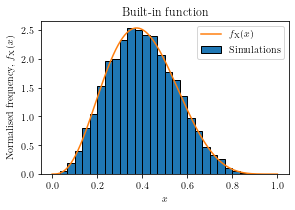

In [6]:
start=time.time() #start counting the (CPU) time
x=[beta.rvs(alphaCoeff,betaCoeff) for i in range(n)]
elapsedTimeBuiltIn=(time.time()-start)
print('Elapsed time for built-in function is: {} s'.format(elapsedTimeBuiltIn))

#plot
plt.figure(figsize=(10 /2.54,7/2.54))
plt.hist(x,30,density=True,range=(0,1),cumulative=False,edgecolor='black',align='mid',label='Simulations')
x=np.linspace(0,1,n,endpoint=False)
plt.plot(x,beta.pdf(x,alphaCoeff,betaCoeff),label='$f_{\mathrm{X}}(x)$')
plt.legend()
plt.title('Built-in function')
plt.xlabel('$x$')
plt.ylabel('Normalised frequency, $f_{\mathrm{X}}(x)$')
plt.tight_layout(pad=0.1)
#plt.savefig('BuiltIn_fX_vs_theoretically.png',dpi=dpiValue)

## Extreme value distribution of finite number of random variables

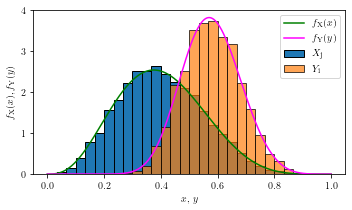

In [7]:
m=2000 #number of Yi's to be generated
n=5 #number of Xj's to be generated for each Yi
X=[]
Y=[]
for i in range(m):
    Xtemporary=[] #for storing Xj's (j=1,...,n) within i'th loop 
    for j in range(n):
        x=beta.rvs(alphaCoeff,betaCoeff)
        X.append(x)
        Xtemporary.append(x)
    Y.append(max(Xtemporary))
#PDF of Y, analytically
x=np.linspace(0,1,m*n,endpoint=False)
fX=beta.pdf(x,alphaCoeff,betaCoeff)
FX=beta.cdf(x,alphaCoeff,betaCoeff)
fY=n*FX**(n-1)*fX 
#plot
fig=plt.figure(figsize=(12/2.54,7/2.54))
ax=plt.axes()
ax.hist(X,30,density=True,range=(0,1),cumulative=False,edgecolor='black',align='mid',
         label='$X_{\mathrm{j}}$')
ax.hist(Y,30,density=True,range=(0,1),cumulative=False,edgecolor='black',align='mid',
         alpha=0.7,label='$Y_{\mathrm{i}}$')
ax.plot(x,fX,color='green',label='$f_{\mathrm{X}}(x)$')
ax.plot(x,fY,color='magenta',label='$f_{\mathrm{Y}}(y)$')
ax.set_xlabel('$x$, $y$')
ax.set_ylabel('$f_{\mathrm{X}}(x), f_{\mathrm{Y}}(y)$')
ax.legend()
plt.tight_layout(pad=0.1)
#plt.savefig('ExtrValDistr.png',dpi=dpiValue)